In [59]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import numpy as np
import matplotlib.pyplot as plt

## Prepare data

In [60]:
mnist = fetch_openml('mnist_784', version=1)

In [61]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [62]:
x, y = mnist['data'], mnist['target']

In [80]:
# only predict 5 or not
y = (y == 5)

In [81]:
y = y.astype(np.uint8)

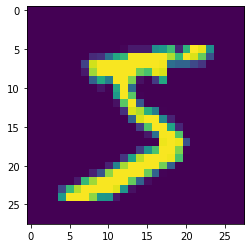

In [82]:
plt.imshow(x[0].reshape((28,28)))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Train Model

In [84]:
from sklearn.linear_model import SGDClassifier

In [85]:
model = SGDClassifier(n_jobs=-1)

In [86]:
model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Cross validation


In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [88]:
folds = StratifiedKFold(n_splits=3)

In [89]:
for train_index, test_index in folds.split(X_train, y_train):
    fold_model = clone(model)
    x_train_fold = X_train[train_index]
    y_train_fold = y_train[train_index]
    
    x_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    fold_model.fit(x_train_fold, y_train_fold)
    y_pred = fold_model.predict(x_test_fold)
    
    number_correct = sum(y_pred == y_test_fold)
    
    print(f"Number correct {number_correct / len(y_pred)}")

Number correct 0.9685940898042728
Number correct 0.960020469519606
Number correct 0.9687200153521397


In [91]:
# Good accuracy but the data is skewed. 90% is not 5. 

### Confusion Matrix

In [94]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [93]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)

In [95]:
confusion_matrix(y_train, y_train_pred)

array([[41366,  1328],
       [  965,  3241]])

In [97]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

In [98]:
precision_score(y_train, y_train_pred)

0.7093455898446049

In [99]:
recall_score(y_train, y_train_pred)

0.77056585829767